# Ex05 - Séries de Taylor



In [28]:
import matplotlib.pyplot as plt
import numpy as np
import math
import numpy as np
import matplotlib.pyplot as plt

### 0. Plotando o cosseno padrão

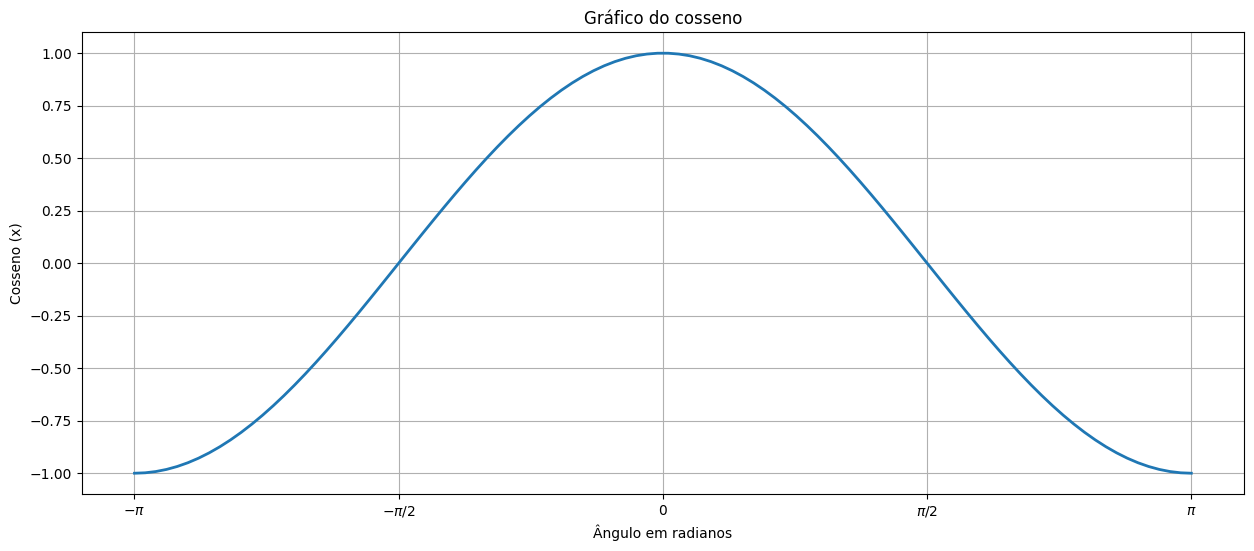

In [4]:
def grafico_em_radianos(fig, ax):
  fig.set_size_inches(15,6)

  custom_ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
  custom_tick_labels = [r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$']
  ax.set_xticks(custom_ticks)
  ax.set_xticklabels(custom_tick_labels)

  # Adicionar labels
  ax.set_xlabel('Ângulo em radianos')
  ax.set_ylabel('Cosseno (x)')
  ax.grid(True)

x = np.linspace(-np.pi, np.pi, 100)
y = np.cos(x)

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=2.0)

ax.set_title('Gráfico do cosseno')
grafico_em_radianos(fig, ax)

plt.show()

### 1. Série de Taylor do cosseno

Referências: [POLINOMIOS E SERIES DE TAYLOR](https://www.ime.usp.br/mat/2456/arquivos/Taylor)

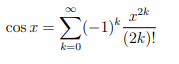

Página 8

In [29]:
def cosseno(x, n = 3):
  soma = 0
  for i in range(0,n):
    fator = 2*i

    sinal = np.pow(-1,i)
    numerador = np.pow(x,fator)
    denominador = math.factorial(fator)

    soma += sinal * numerador / denominador
  return soma

### 2. Série de Taylor otimizada e cálculo rápido

In [30]:
def cosseno_otimizado(x, n = 3):
    numerador = 1
    denominador = 1
    soma = numerador / denominador
    sinal = 1

    for i in range(1,n):
        fator = 2*i
        sinal = -1 * sinal

        numerador = x*x*numerador
        denominador = fator * (fator-1) * denominador

        soma += sinal * numerador / denominador
    return soma


In [35]:
valores = [0, math.pi/6, math.pi/4, math.pi/3, math.pi/2, math.pi]

for x in valores:
    print(f"x = {x:.2f}, cosseno = {cosseno_otimizado(x, n=6)}, exato = {math.cos(x):.6f}")

x = 0.00, cosseno = 1.0, exato = 1.000000
x = 0.52, cosseno = 0.8660254037835535, exato = 0.866025
x = 0.79, cosseno = 0.7071067810719247, exato = 0.707107
x = 1.05, cosseno = 0.4999999963909432, exato = 0.500000
x = 1.57, cosseno = -4.647660083659713e-07, exato = 0.000000
x = 3.14, cosseno = -1.0018291040136216, exato = -1.000000


### 3. Série de Taylor para precisão com N até 20

In [32]:
x_vals = np.linspace(-10, 10, 1000)
dif = []

for x in x_vals:
    dif.append(abs(cosseno_otimizado(x, 20) - math.cos(x)))

dif = np.array(dif)

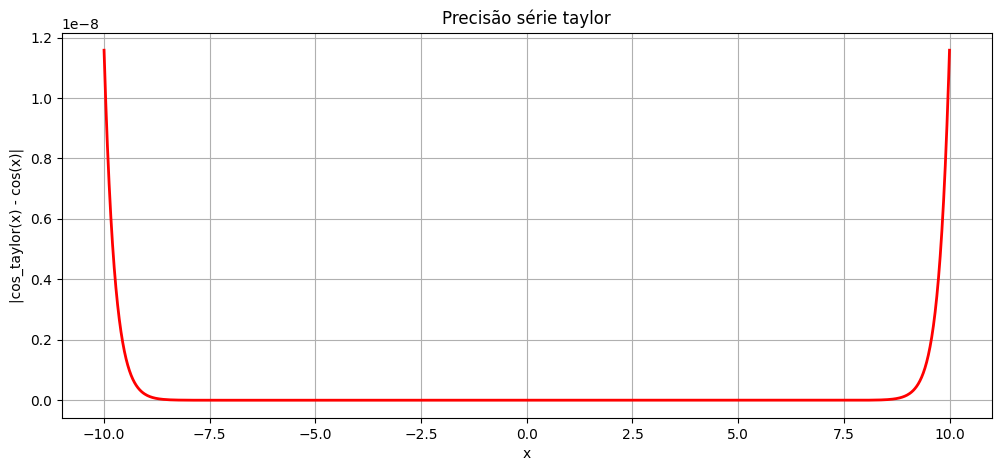

In [34]:
plt.figure(figsize=(12,5))
plt.plot(x_vals, dif, color='red', linewidth=2)
plt.title("Precisão série taylor")
plt.xlabel("x")
plt.ylabel("|cos_taylor(x) - cos(x)|")
plt.grid(True)
plt.show()